# Movielense Dataset EDA

### data
    ├── directors.tsv
    ├── genres.tsv
    ├── titles.tsv
    ├── train_ratings.csv
    ├── writers.tsv
    └── years.tsv
    
1. *train_ratings.csv* : 전체 훈련 데이터.
2. *directors.tsv*, *genres.tsv*, *writers.tsv*, *years.tsv*, *titles.tsv* : 영화의 side-information 데이터.

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

/tmp/ipykernel_723215/1066052526.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 영화(Item)에 대한 EDA

In [39]:
data_path = '../../data/train'
ratings_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
year_df = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_df = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_df = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_df = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_df = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [42]:
genre_df_grouped = genre_df.groupby('item')['genre'].apply(lambda x: '|'.join(x)).reset_index()
director_df_grouped = director_df.groupby('item')['director'].apply(lambda x: '|'.join(x)).reset_index()
writer_df_df_grouped = writer_df.groupby('item')['writer'].apply(lambda x: '|'.join(x)).reset_index()
movie_df = title_df.merge(year_df, on='item', how='outer')
movie_df = movie_df.merge(writer_df_df_grouped, on='item', how='outer')
movie_df = movie_df.merge(director_df_grouped, on='item', how='outer')
movie_df = movie_df.merge(genre_df_grouped, on='item', how='outer')

In [43]:
ratings_df

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [44]:
# ratings_df를 기반으로 영화(item)별 시청한 사용자(user) 수(count) 계산
views_count = ratings_df.groupby('item')['user'].count().reset_index(name='views')
views_count

# 기존 데이터프레임과 병합하여 'views' 칼럼 추가
movie_df = movie_df.merge(views_count, on='item', how='left')

In [45]:
movie_df

,item,title,year,writer,director,genre,views
0,1,Toy Story (1995),1995.0,nm0004056|nm0005124|nm0169505|nm0230032|nm0710...,nm0005124,Adventure|Animation|Children|Comedy|Fantasy,12217
1,2,Jumanji (1995),1995.0,nm0378144|nm0852430|nm0885575,nm0002653,Adventure|Children|Fantasy,3364
2,3,Grumpier Old Men (1995),1995.0,nm0425756,nm0222043,Comedy|Romance,734
3,4,Waiting to Exhale (1995),1995.0,nm0060103,nm0001845,Comedy|Drama|Romance,43
4,5,Father of the Bride Part II (1995),1995.0,nm0329304|nm0352443|nm0583600|nm0796124,nm0796124,Comedy,590
...,...,...,...,...,...,...,...
6802,118700,Selma (2014),2014.0,NaN,NaN,Drama,54
6803,118900,Wild (2014),2014.0,nm0394984,nm0885249,Drama,60
6804,118997,Into the Woods (2014),2014.0,nm0487567,nm0551128,Children|Comedy|Fantasy|Musical,52
6805,119141,The Interview (2014),2014.0,nm0736622|nm1698571,nm0736622|nm1698571,Action|Comedy,122


In [51]:
print(f"감독의 고유값: {len(director_df['director'].unique())}")
print(f"병합 후 중복 포함된 감독의 고유값: {len(movie_df['director'].unique())}")
print(f"작가의 고유값: {len(writer_df['writer'].unique())}")
print(f"병합 후 중복 포함된 작가의 고유값: {len(movie_df['writer'].unique())}")
print(f"장르의 고유값: {len(genre_df['genre'].unique())}")
print(f"병합 후 중복 포함된 장르의 고유값: {len(movie_df['genre'].unique())}")

감독의 고유값: 1340
병합 후 중복 포함된 감독의 고유값: 1400
작가의 고유값: 2989
병합 후 중복 포함된 작가의 고유값: 3839
장르의 고유값: 18
병합 후 중복 포함된 장르의 고유값: 759


In [32]:
# 결측치 확인
missing_values = movie_df.isnull().sum()
print(missing_values)

item           0
title          0
year           8
writer      1159
director    1304
genre          0
views          0
dtype: int64


In [33]:
# 제목에 마지막의 연도로 year 칼럼의 결측치 대체
movie_df['year'].fillna(movie_df['title'].str[-5:-1], inplace=True)
movie_df['year'] = movie_df['year'].astype('int')
missing_values = movie_df.isnull().sum()
print(missing_values)

item           0
title          0
year           0
writer      1159
director    1304
genre          0
views          0
dtype: int64


/tmp/ipykernel_670154/3478415007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df['year'].fillna(movie_df['title'].str[-5:-1], inplace=True)
/tmp/ipykernel_670154/3478415007.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1921' '1920' '1919' '1915' '1916' '1917' '1902' '2015']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movie_df['year'].fillna(movie_df['title'].str[-5:-1], inplace

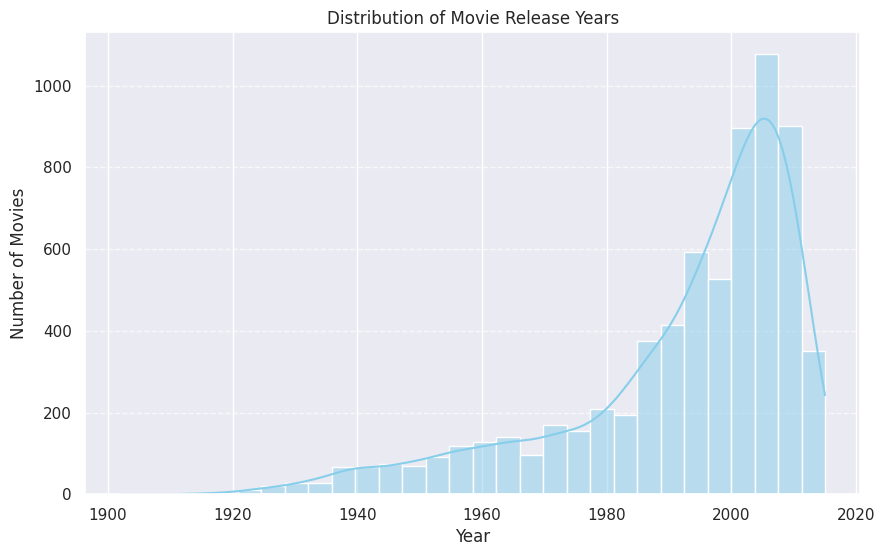

In [34]:
import seaborn as sns

# 시각화
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['year'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


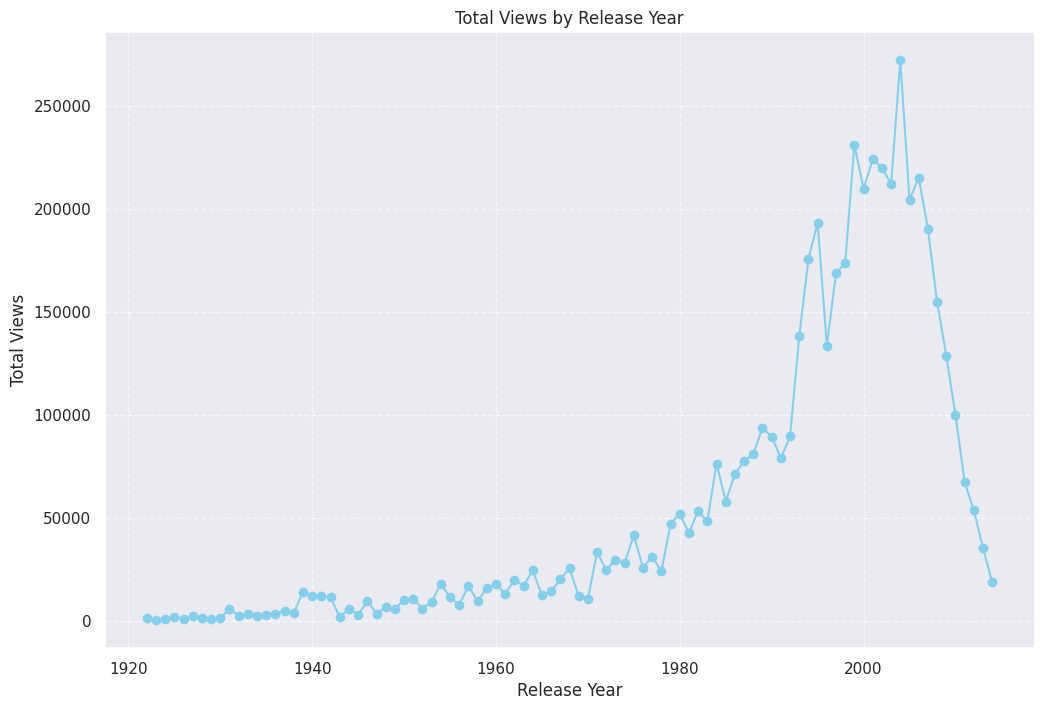

In [56]:
# 연도별로 데이터 그룹화하여 시청 횟수 합계 계산
views_by_year = movie_df.groupby('year')['views'].sum()

# 시각화
plt.figure(figsize=(12, 8))
views_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Views by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Views')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


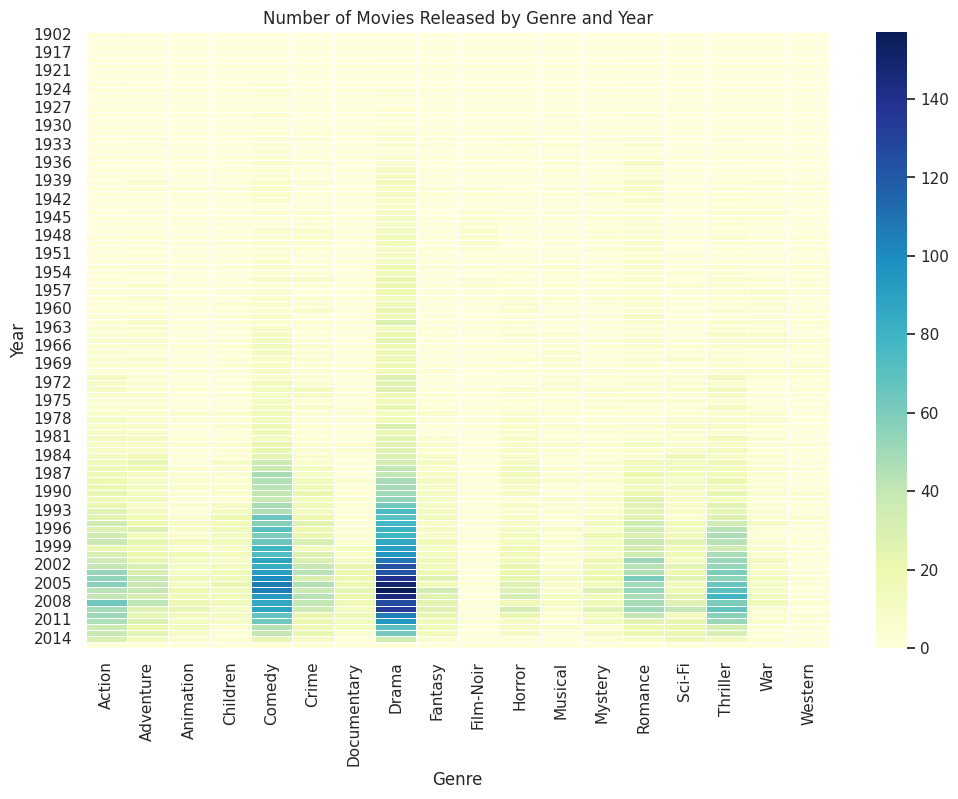

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# '|'를 기준으로 장르를 분할하여 리스트로 저장
movie_df['genre'] = movie_df['genre'].str.split('|')

# 연도별 각 장르의 출시 횟수 계산
genre_counts_by_year = movie_df.explode('genre').groupby(['year', 'genre']).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(genre_counts_by_year, cmap='YlGnBu', linewidths=0.5)
plt.title('Number of Movies Released by Genre and Year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()


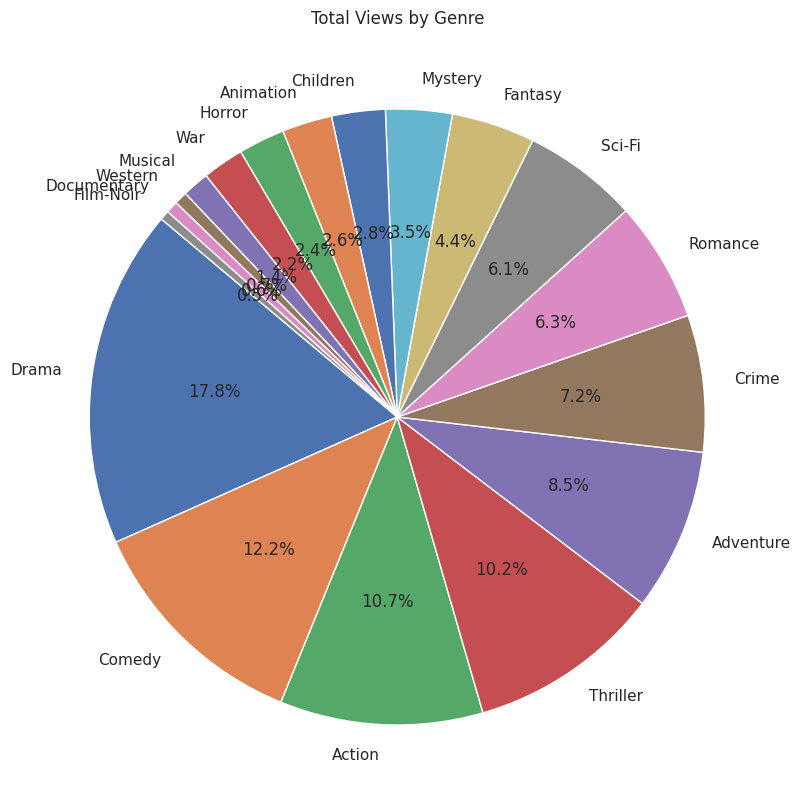

In [58]:
# '|'로 구분된 장르 정보를 분리하여 각 장르를 개별 행으로 만들기
genre_df = movie_df['genre'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
genre_df.name = 'genre'

# movie_df에 장르 정보 추가
movie_df_genre = movie_df.drop('genre', axis=1).join(genre_df)

# 장르별로 시청 횟수 합계 계산
views_by_genre = movie_df_genre.groupby('genre')['views'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 10))
plt.pie(views_by_genre, labels=views_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Views by Genre')
plt.show()


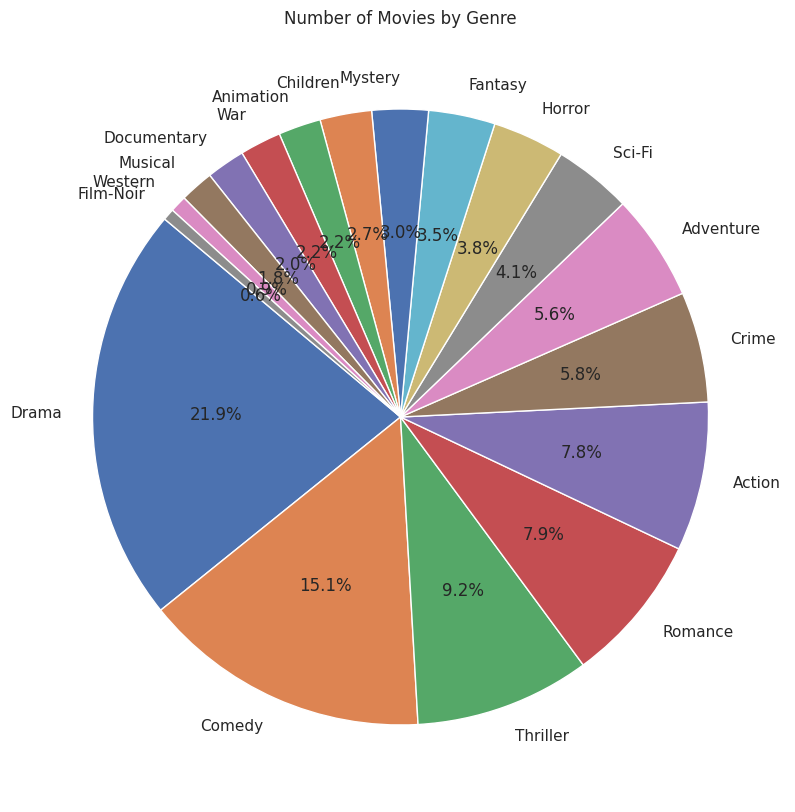

In [59]:
# 장르별 영화 개수 카운트
count_by_genre = movie_df_genre['genre'].value_counts()

# 시각화
plt.figure(figsize=(10, 10))
plt.pie(count_by_genre, labels=count_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Movies by Genre')
plt.show()


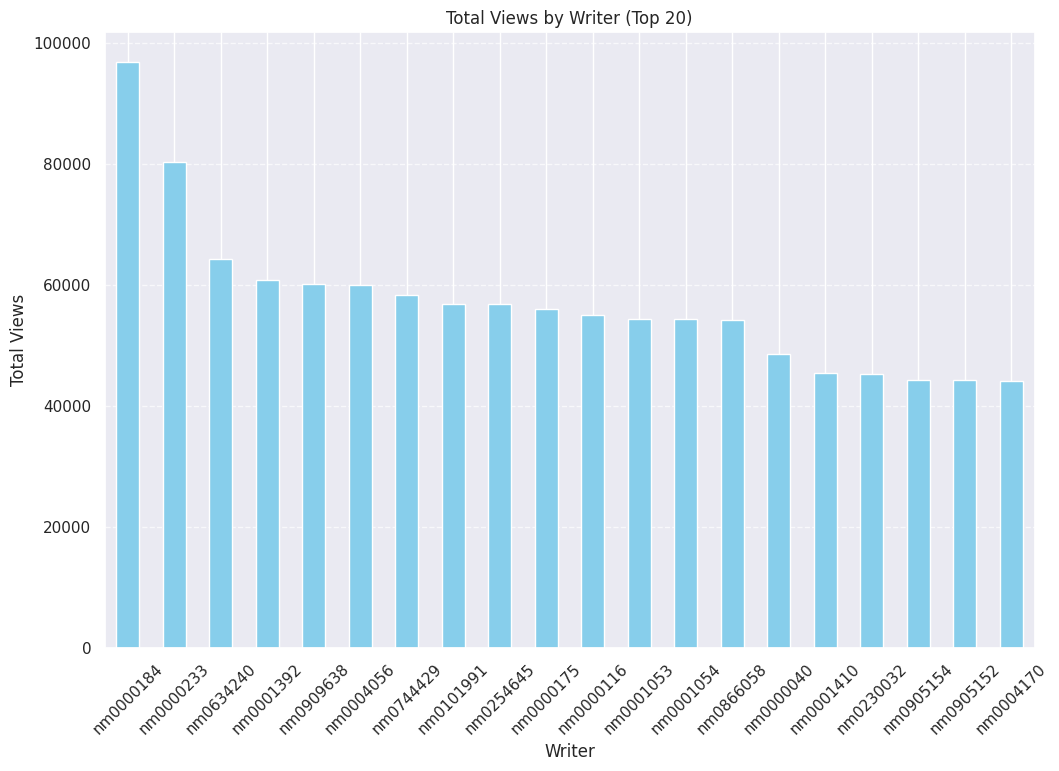

In [65]:
# '|'로 구분된 작가 정보를 분리하여 각 작가를 개별 행으로 만들기
writer_df = movie_df['writer'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
writer_df.name = 'writer'

# movie_df에 작가 정보 추가
movie_df_writer = movie_df.drop('writer', axis=1).join(writer_df)

# 작가별로 시청 횟수 합계 계산
views_by_writer = movie_df_writer.groupby('writer')['views'].sum().sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 8))
views_by_writer.plot(kind='bar', color='skyblue')
plt.title('Total Views by Writer (Top 20)')
plt.xlabel('Writer')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



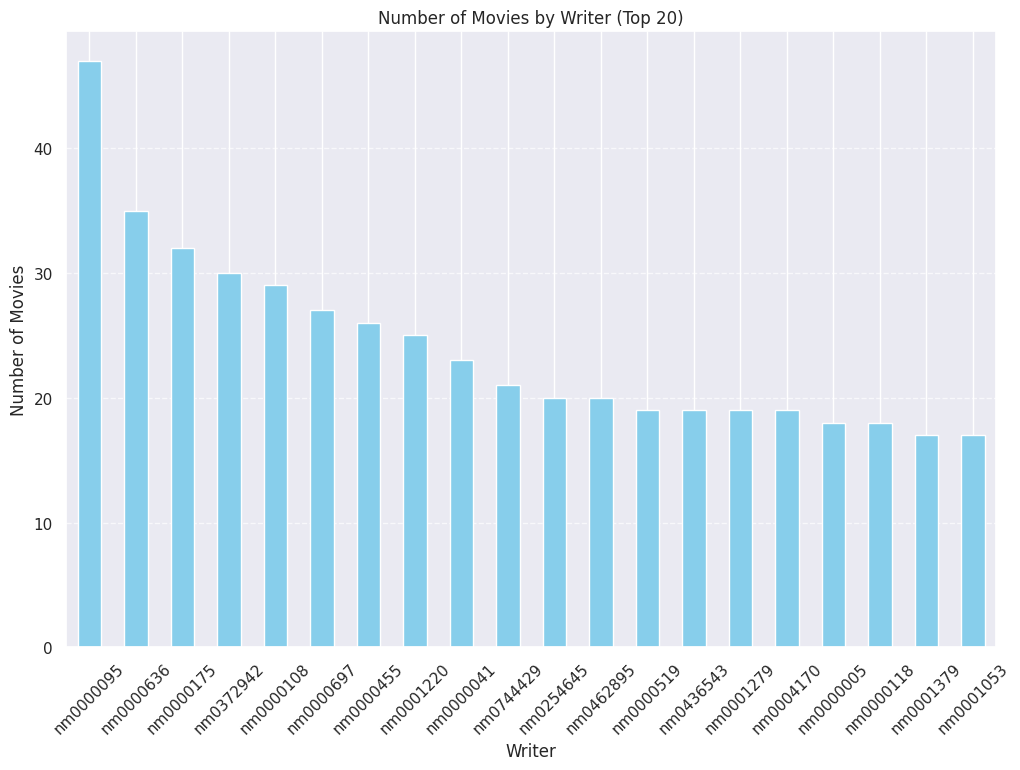

In [66]:
# 작가별로 영화의 개수 카운트
count_by_writer = movie_df_writer['writer'].value_counts().head(20)

# 시각화
plt.figure(figsize=(12, 8))
count_by_writer.plot(kind='bar', color='skyblue')
plt.title('Number of Movies by Writer (Top 20)')
plt.xlabel('Writer')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

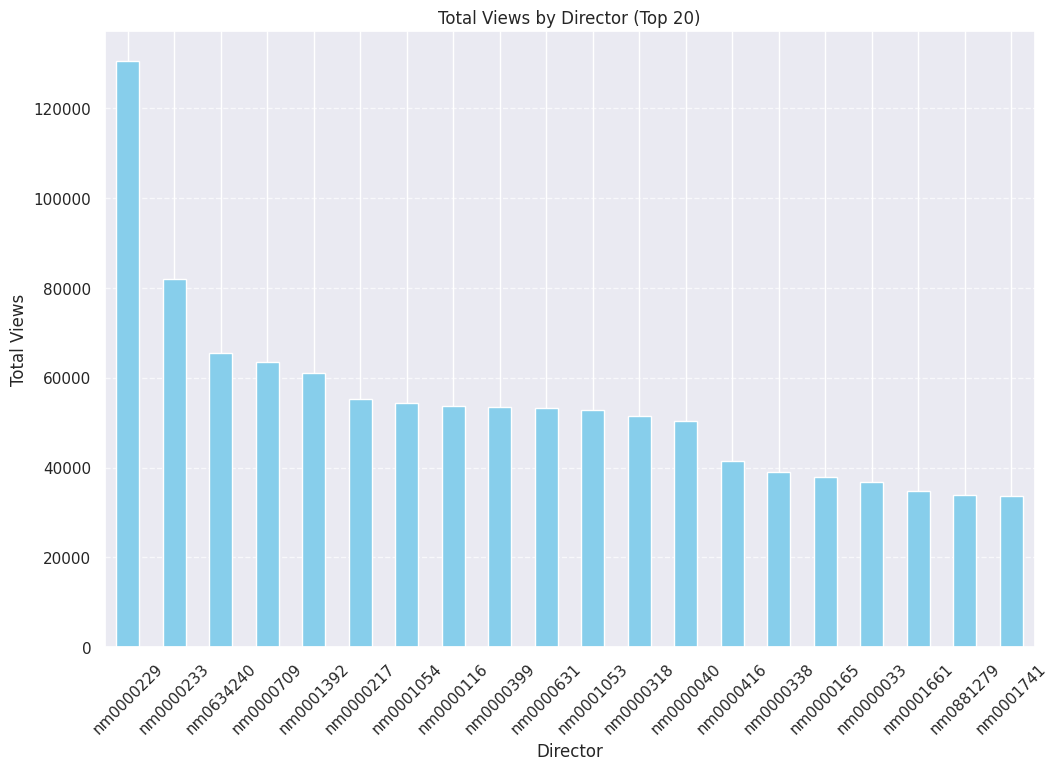

In [68]:
# '|'로 구분된 감독 정보를 분리하여 각 감독을 개별 행으로 만들기
director_df = movie_df['director'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
director_df.name = 'director'

# movie_df에 감독 정보 추가
movie_df_director = movie_df.drop('director', axis=1).join(director_df)

# 감독별로 시청 횟수 합계 계산
views_by_director = movie_df_director.groupby('director')['views'].sum().sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 8))
views_by_director.plot(kind='bar', color='skyblue')
plt.title('Total Views by Director (Top 20)')
plt.xlabel('Director')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


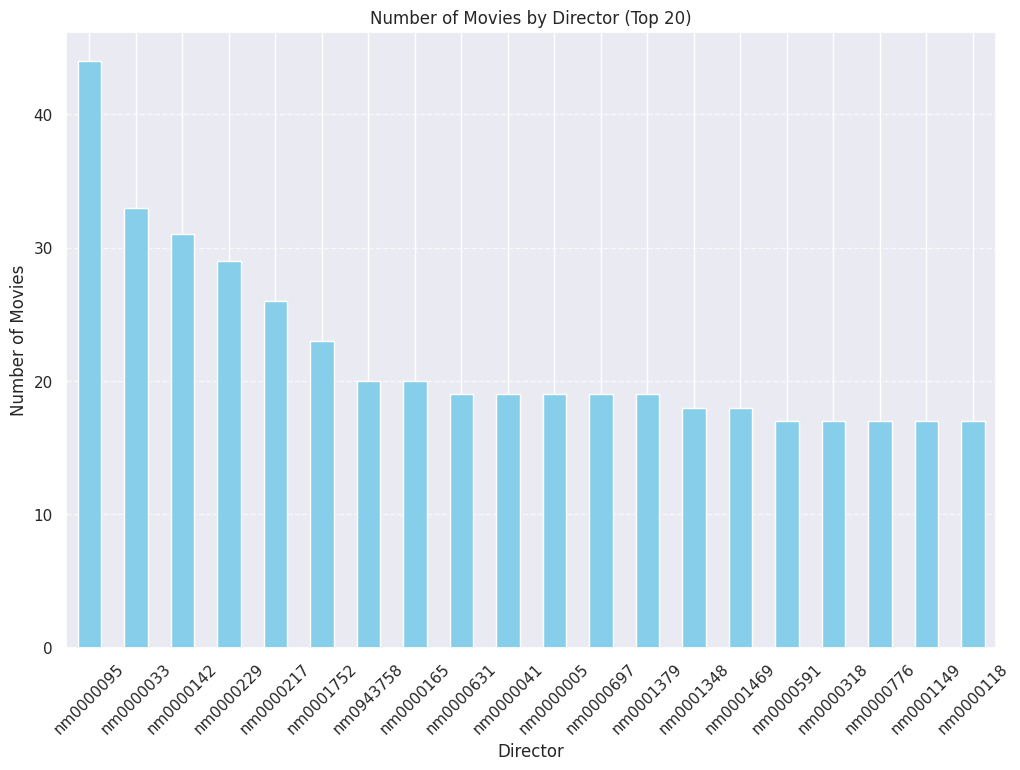

In [69]:
# 감독별로 영화의 개수 카운트
count_by_director = movie_df_director['director'].value_counts().head(20)

# 시각화
plt.figure(figsize=(12, 8))
count_by_director.plot(kind='bar', color='skyblue')
plt.title('Number of Movies by Director (Top 20)')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


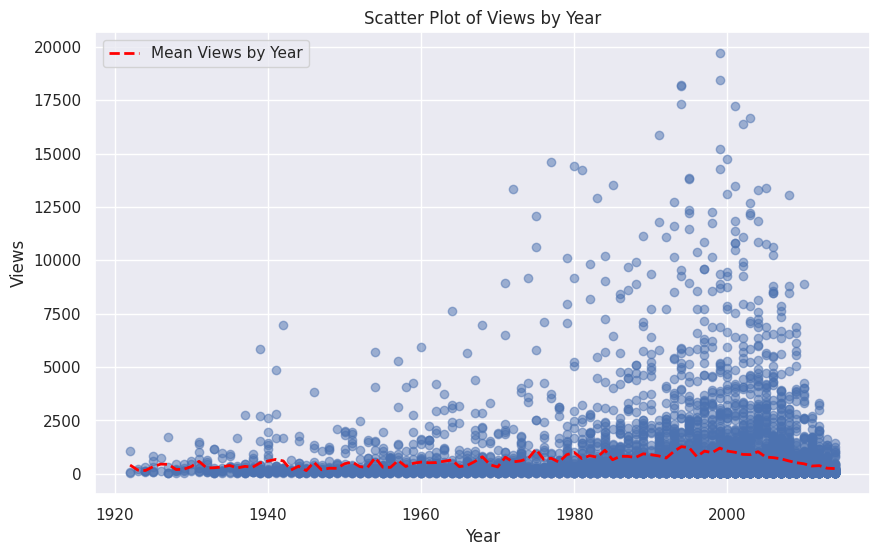

In [70]:
# 연도별 시청 횟수의 평균 계산
views_by_year = movie_df.groupby('year')['views'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(movie_df['year'], movie_df['views'], alpha=0.5)
plt.plot(views_by_year.index, views_by_year.values, color='red', linestyle='--', linewidth=2, label='Mean Views by Year')
plt.title('Scatter Plot of Views by Year')
plt.xlabel('Year')
plt.ylabel('Views')
plt.legend()
plt.grid(True)
plt.show()

## 유저(User)에 대한 EDA

In [6]:
data_path = '../../data/train'
ratings_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
year_df = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_df = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_df = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_df = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_df = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [7]:
genre_df_grouped = genre_df.groupby('item')['genre'].apply(lambda x: '|'.join(x)).reset_index()
director_df_grouped = director_df.groupby('item')['director'].apply(lambda x: '|'.join(x)).reset_index()
writer_df_df_grouped = writer_df.groupby('item')['writer'].apply(lambda x: '|'.join(x)).reset_index()
movie_df = title_df.merge(year_df, on='item', how='outer')
movie_df = movie_df.merge(writer_df_df_grouped, on='item', how='outer')
movie_df = movie_df.merge(director_df_grouped, on='item', how='outer')
movie_df = movie_df.merge(genre_df_grouped, on='item', how='outer')

In [8]:
# ratings_df를 기반으로 영화(item)별 시청한 사용자(user) 수(count) 계산
views_count = ratings_df.groupby('item')['user'].count().reset_index(name='views')
views_count

# 기존 데이터프레임과 병합하여 'views' 칼럼 추가
movie_df = movie_df.merge(views_count, on='item', how='left')

In [9]:
movie_df

,item,title,year,writer,director,genre,views
0,1,Toy Story (1995),1995.0,nm0004056|nm0005124|nm0169505|nm0230032|nm0710...,nm0005124,Adventure|Animation|Children|Comedy|Fantasy,12217
1,2,Jumanji (1995),1995.0,nm0378144|nm0852430|nm0885575,nm0002653,Adventure|Children|Fantasy,3364
2,3,Grumpier Old Men (1995),1995.0,nm0425756,nm0222043,Comedy|Romance,734
3,4,Waiting to Exhale (1995),1995.0,nm0060103,nm0001845,Comedy|Drama|Romance,43
4,5,Father of the Bride Part II (1995),1995.0,nm0329304|nm0352443|nm0583600|nm0796124,nm0796124,Comedy,590
...,...,...,...,...,...,...,...
6802,118700,Selma (2014),2014.0,NaN,NaN,Drama,54
6803,118900,Wild (2014),2014.0,nm0394984,nm0885249,Drama,60
6804,118997,Into the Woods (2014),2014.0,nm0487567,nm0551128,Children|Comedy|Fantasy|Musical,52
6805,119141,The Interview (2014),2014.0,nm0736622|nm1698571,nm0736622|nm1698571,Action|Comedy,122


In [10]:
# 제목에 마지막의 연도로 year 칼럼의 결측치 대체
movie_df['year'].fillna(movie_df['title'].str[-5:-1], inplace=True)
movie_df['year'] = movie_df['year'].astype('int')

/tmp/ipykernel_723215/4043082145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df['year'].fillna(movie_df['title'].str[-5:-1], inplace=True)
/tmp/ipykernel_723215/4043082145.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1921' '1920' '1919' '1915' '1916' '1917' '1902' '2015']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movie_df['year'].fillna(movie_df['title'].str[-5:-1], inplace

In [11]:
# ratings_df와 movie_df를 사용자(user)를 기준으로 병합
data_df = pd.merge(ratings_df, movie_df, on='item', how='outer').sort_values(by=['user', 'time'])
data_df

,user,item,time,title,year,writer,director,genre,views
2823158,11,4643,1230782529,Planet of the Apes (2001),2001,nm0099541|nm0115310|nm0465199|nm0742797,nm0000318,Action|Adventure|Drama|Sci-Fi,1122
174279,11,170,1230782534,Hackers (1995),1995,NaN,nm0812200,Action|Adventure|Crime|Thriller,1107
471863,11,531,1230782539,"Secret Garden, The (1993)",1993,nm0003031|nm0122364,nm0002140,Children|Drama,966
589952,11,616,1230782542,"Aristocats, The (1970)",1970,nm0027011|nm0166307|nm0166551|nm0314788|nm0841...,nm0718627,Animation|Children,1101
1763259,11,2140,1230782563,"Dark Crystal, The (1982)",1982,nm0001345|nm0643973,nm0000568|nm0001345,Adventure|Fantasy,1516
...,...,...,...,...,...,...,...,...,...
4177889,138493,44022,1260209449,Ice Age 2: The Meltdown (2006),2006,nm0310087|nm0841532|nm5022110,nm0757858,Adventure|Animation|Children|Comedy,1282
2907810,138493,4958,1260209482,Behind Enemy Lines (2001),2001,nm0672015|nm0859029|nm0859049|nm0892705,nm0601382,Action|Drama|War,621
4767808,138493,68319,1260209720,X-Men Origins: Wolverine (2009),2009,nm0940790|nm1125275,nm0004303,Action|Sci-Fi|Thriller,1443
4141979,138493,40819,1260209726,Walk the Line (2005),2005,nm0003506|nm0219456,nm0003506,Drama|Musical|Romance,4730


In [12]:
len(data_df['user'].unique())

31360

In [13]:
import datetime

# Unix 시간을 날짜 및 시간 형식으로 변환하는 함수 정의
def convert_unix_time_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S')

# 시간(time) 칼럼을 Unix 시간에서 날짜 및 시간 형식으로 변환
data_df['time'] = data_df['time'].apply(convert_unix_time_to_datetime)



In [14]:
# 데이터프레임의 인덱스 초기화
data_df.reset_index(drop=True, inplace=True)


In [15]:
# 'time' 칼럼을 datetime 형식으로 변환
data_df['time'] = pd.to_datetime(data_df['time'])

# 월별 정보를 추출하여 새로운 칼럼 추가
data_df['month'] = data_df['time'].dt.month

# 주간/주말 여부를 나타내는 칼럼 추가
data_df['is_weekend'] = data_df['time'].dt.dayofweek // 5  # 5 이상인 값은 주말

# 시간대별 칼럼 추가 (예시: 0~6시는 Dawn, 6~12시는 Morning, ...)
def get_time_period(hour):
    if 0 <= hour < 6:
        return 'Dawn'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data_df['time_period'] = data_df['time'].dt.hour.apply(get_time_period)


In [16]:
data_df = data_df.reindex(columns=['user', 'item', 'time',  'month', 'is_weekend', 'time_period', 'title', 'year', 'writer', 'director', 'genre', 'views'])

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user         int64         
 1   item         int64         
 2   time         datetime64[ns]
 3   month        int32         
 4   is_weekend   int32         
 5   time_period  object        
 6   title        object        
 7   year         int64         
 8   writer       object        
 9   director     object        
 10  genre        object        
 11  views        int64         
dtypes: datetime64[ns](1), int32(2), int64(4), object(5)
memory usage: 432.6+ MB


In [18]:
# 주말과 평일의 시청량 비교
weekend_views = data_df[data_df['is_weekend'] == 1]['views'].sum()
weekday_views = data_df[data_df['is_weekend'] == 0]['views'].sum()

# 결과 출력
print("주말 시청량:", weekend_views)
print("평일 시청량:", weekday_views)


주말 시청량: 6821268644
평일 시청량: 16359159917


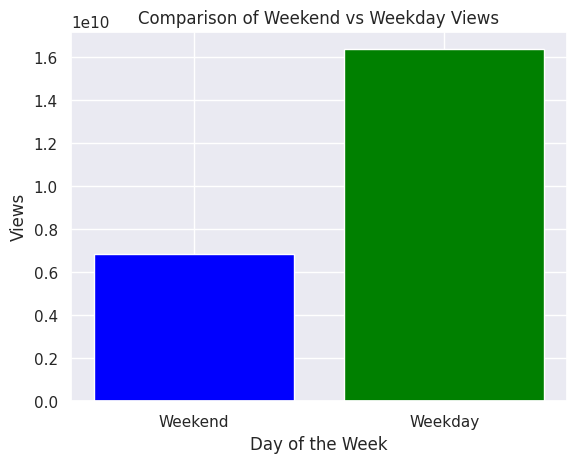

In [19]:
import matplotlib.pyplot as plt

# Views data
views_data = [weekend_views, weekday_views]
labels = ['Weekend', 'Weekday']

# Visualization
plt.bar(labels, views_data, color=['blue', 'green'])
plt.xlabel('Day of the Week')
plt.ylabel('Views')
plt.title('Comparison of Weekend vs Weekday Views')
plt.show()



time_period
Afternoon    5340343742
Dawn         6149282404
Evening      7929306307
Morning      3761496108
Name: views, dtype: int64


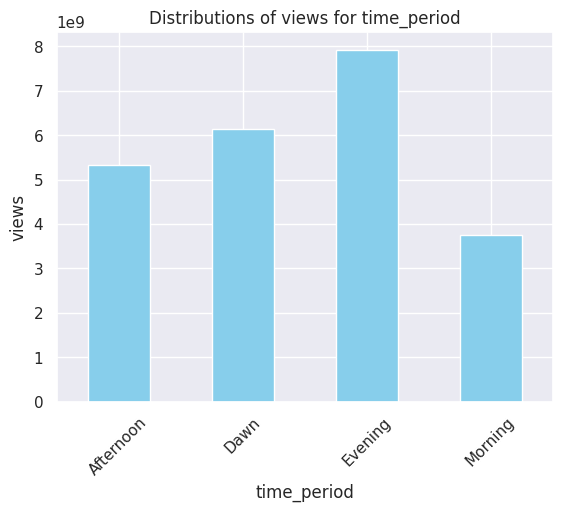

In [20]:
# 시간대별 시청량 분석
time_period_views = data_df.groupby('time_period')['views'].sum()

# 결과 출력
print(time_period_views)

# 시각화
time_period_views.plot(kind='bar', color='skyblue')
plt.xlabel('time_period')
plt.ylabel('views')
plt.title('Distributions of views for time_period')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()


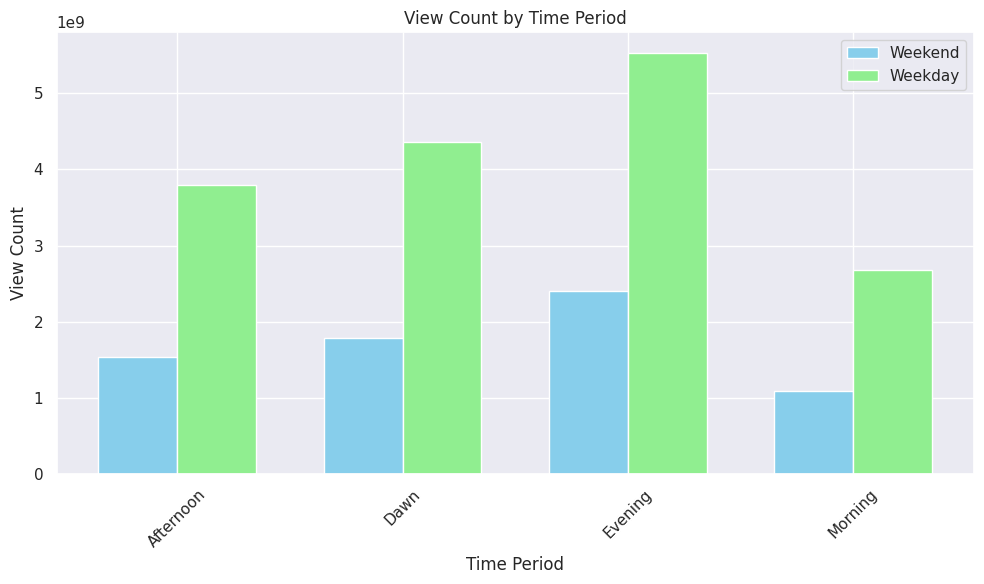

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 주말과 주중의 시간대별 시청량 계산
weekend_time_views = data_df[data_df['is_weekend'] == 1].groupby('time_period')['views'].sum()
weekday_time_views = data_df[data_df['is_weekend'] == 0].groupby('time_period')['views'].sum()

# 시간대 목록
time_periods = weekend_time_views.index.tolist()

# 막대그래프를 그리기 위한 x 좌표 설정
x = np.arange(len(time_periods))

# 막대그래프 그리기
width = 0.35  # 막대의 너비 설정
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, weekend_time_views, width, label='Weekend', color='skyblue')
bars2 = ax.bar(x + width/2, weekday_time_views, width, label='Weekday', color='lightgreen')

# 레이블, 제목, 범례 추가
ax.set_xlabel('Time Period')
ax.set_ylabel('View Count')
ax.set_title('View Count by Time Period')
ax.set_xticks(x)
ax.set_xticklabels(time_periods)
ax.legend()

# 그래프 보여주기
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


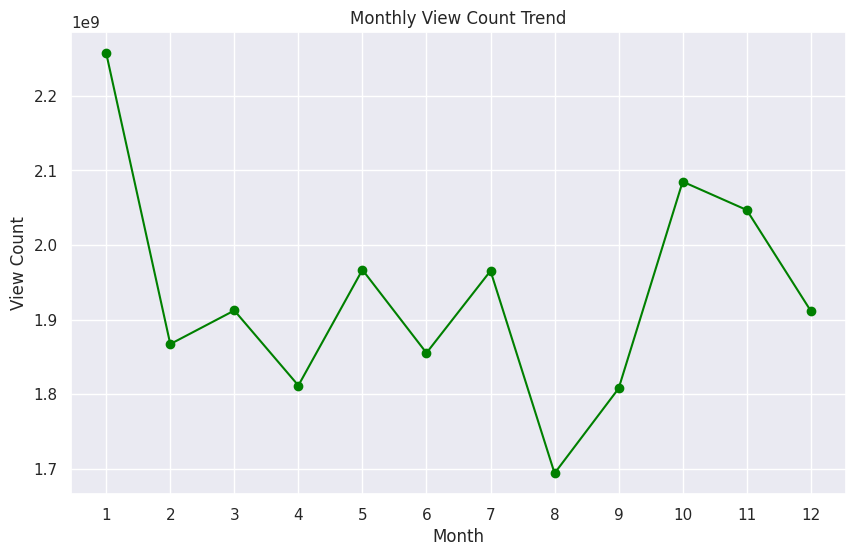

In [22]:
# 월별 시청 횟수 계산
monthly_views = data_df.groupby('month')['views'].sum()

# 시각화
plt.figure(figsize=(10, 6))  # 크기 조절
monthly_views.plot(kind='line', marker='o', color='green')
plt.xticks(range(1, 13))  # x 축에 월 이름 설정
plt.xlabel('Month')
plt.ylabel('View Count')
plt.title('Monthly View Count Trend')
plt.grid(True)  # 격자 표시
plt.show()